# Real Estate Price Prediction

## Загрузка модулей

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')

### Подготовка данных


In [2]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

## Data fields
Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

In [3]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)

### Смотрим данные на предмет пропусков

In [4]:
df_train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [79]:
df_train.tail(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9990,15233,1,3.0,57.373889,39.688445,5.0,2,5.0,1962,0.036270,B,B,6,1318,1,200.0,1,1,B,163807.542987
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504
9992,14333,150,3.0,78.249637,49.385096,10.0,5,16.0,1976,0.300323,B,B,52,10311,6,NaN,1,9,B,342418.758888
9993,48,13,3.0,80.631333,48.899083,10.0,11,14.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,350684.628560
9994,4158,23,2.0,64.864198,NaN,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,171323.515653
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


### Размер датафрейма и названия столбцов

In [76]:
df_train.shape

(10000, 20)

In [77]:
df_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

### Приведение типов данных

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


Всего тысяча строк, но как видно, есть пропуски в данных в LifeSquare и Healthcare_1

In [110]:
df_train['Id'].dtype

dtype('int64')

### Обзор количественных переменных

In [106]:
df_train_num_features = df.select_dtypes(include=['float64', 'int64'])
df_train_num_features.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,NaN,0,11,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,35,7715,4,990.0,0,6,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,20,4386,14,NaN,1,5,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,6,1437,3,NaN,0,2,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,1,264,0,NaN,0,1,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,6,1437,3,NaN,0,2,95380.220993


Анализиуем показатели переменных

In [107]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Количество комнат не может быть 0, общая площадь не может быть чуть больше одного метра, площадь кухни не может быть 0, этажность дома не может быть 0, так же как и крайние значения этих параметров. Количество комнат вряд ли может быть больше 5. 117-ти этажный дом аналогично можно поставить под сомнение.

Приведение id районов к строковому типу - чтобы не анализировать их числами

In [113]:
df_train['DistrictId'] = df_train['DistrictId'].astype(str)
df_train['DistrictId'].dtype

dtype('O')

### Анализируем данные на корректность

Зависимость общей площади от количества комнат

Text(0, 0.5, 'Общая площадь')

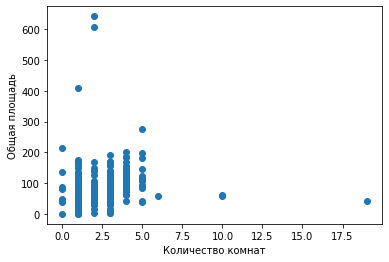

In [90]:
plt.scatter(df_train.Rooms, df_train.Square)
plt.xlabel("Количество комнат")
plt.ylabel("Общая площадь")

Зависимость стоимости от количества комнат

Text(0, 0.5, 'Стоимость квартиры')

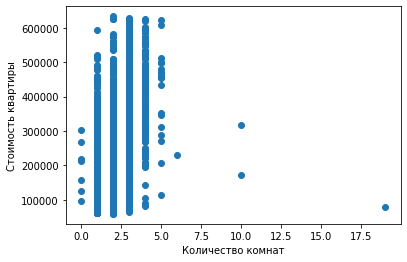

In [91]:
plt.scatter(df_train.Rooms, df_train.Price)
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры")

Зависимость общей площади от жилой площади

Text(0, 0.5, 'Общая площадь')

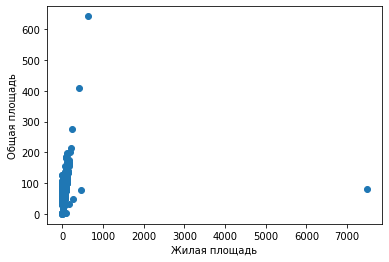

In [97]:
plt.scatter(df_train.LifeSquare, df_train.Square)
plt.xlabel("Жилая площадь")
plt.ylabel("Общая площадь")

Зависимость площади кухни от жилой площади

Text(0, 0.5, 'Площадь кухни')

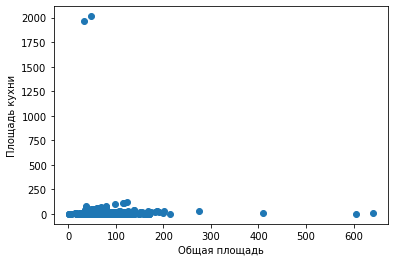

In [99]:
plt.scatter(df_train.Square, df_train.KitchenSquare)
plt.xlabel("Общая площадь")
plt.ylabel("Площадь кухни")

Этаж квартиры не может быть больше количества этажей в доме, так же под сомнением нулевая этажность дома

Text(0, 0.5, 'Этаж квартиры')

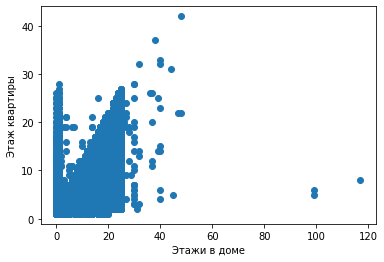

In [101]:
plt.scatter(df_train.HouseFloor, df_train.Floor)
plt.xlabel("Этажи в доме")
plt.ylabel("Этаж квартиры")

### Обработка выбросов

Количество комнат

In [114]:
df_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [117]:
df_train.loc[df_train['Rooms'].isin([0, 6, 10, 19]), 'Rooms'] = df_train['Rooms'].median()
df_train['Rooms'].value_counts()

2.0    3892
1.0    3705
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

Общая площадь

In [11]:
df_train['LifeSquare'].value_counts()

35.812832    1
58.218079    1
35.213655    1
23.656629    1
4.289714     1
            ..
82.418226    1
43.005439    1
56.867287    1
87.018830    1
33.743934    1
Name: LifeSquare, Length: 7887, dtype: int64

In [39]:
df_train.loc[df_train['LifeSquare'] < 15, 'LifeSquare'] = 15
df_train.loc[df_train['LifeSquare'] > 350, 'LifeSquare'] = 350
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()

floor_out = df_train[df_train['Floor'] > df_train['HouseFloor']].index
df_train.loc[floor_out, 'Floor'] = df_train.loc[floor_out, 'HouseFloor'].apply(lambda x: random.randint(1, x))

df_train.loc[df_train['HouseYear'] == 20052011, 'HouseYear'] = 2011
df_train.loc[df_train['HouseYear'] > 2020, 'HouseYear'] = 2020

df_train.loc[df_train['KitchenSquare'] < 3, 'KitchenSquare'] = 3
df_train.loc[df_train['LifeSquare'].isnull(), 'LifeSquare'] = df_train['LifeSquare'].median()

df_train.loc[df_train['Healthcare_1'].isnull(), 'Healthcare_1'] = df_train['Healthcare_1'].median()

Train & val
